In [ ]:
pip install gcmap

     |████████████████████████████████| 798kB 4.2MB/s 
  Created wheel for gcmap: filename=gcmap-0.0.6-cp36-none-any.whl size=4731 sha256=e20227f94f37a91a45e55dfc067713f715140dba295d93dc7e8934b4a8a3c919
  Stored in directory: /root/.cache/pip/wheels/58/c2/0d/8d2917c0b29e31f64e1033583b517fd8a04a69484c17479b38
Successfully built gcmap


In [ ]:
 pip install --upgrade matplotlib

     |████████████████████████████████| 11.6MB 5.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import pandas as pd
from gcmap import GCMapper, Gradient

In [ ]:
# define CSV colum names
CSV_COLS = ('dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'nb_flights', 'CO2')

routes = pd.read_csv('data_flights.csv', names=CSV_COLS,na_values=['\\N'], sep=';', skiprows=1)

# create gradient to color the routes according to the number of flights
grad = Gradient(((0, 0, 0, 0), (0.5, 204, 0, 153), (1, 255, 204, 230)))

# initialize GCMapper and set data
gcm = GCMapper(cols=grad, height=2000, width=4000)
gcm.set_data(routes['dep_lon'], routes['dep_lat'], routes['arr_lon'],
             routes['arr_lat'], routes['nb_flights'])

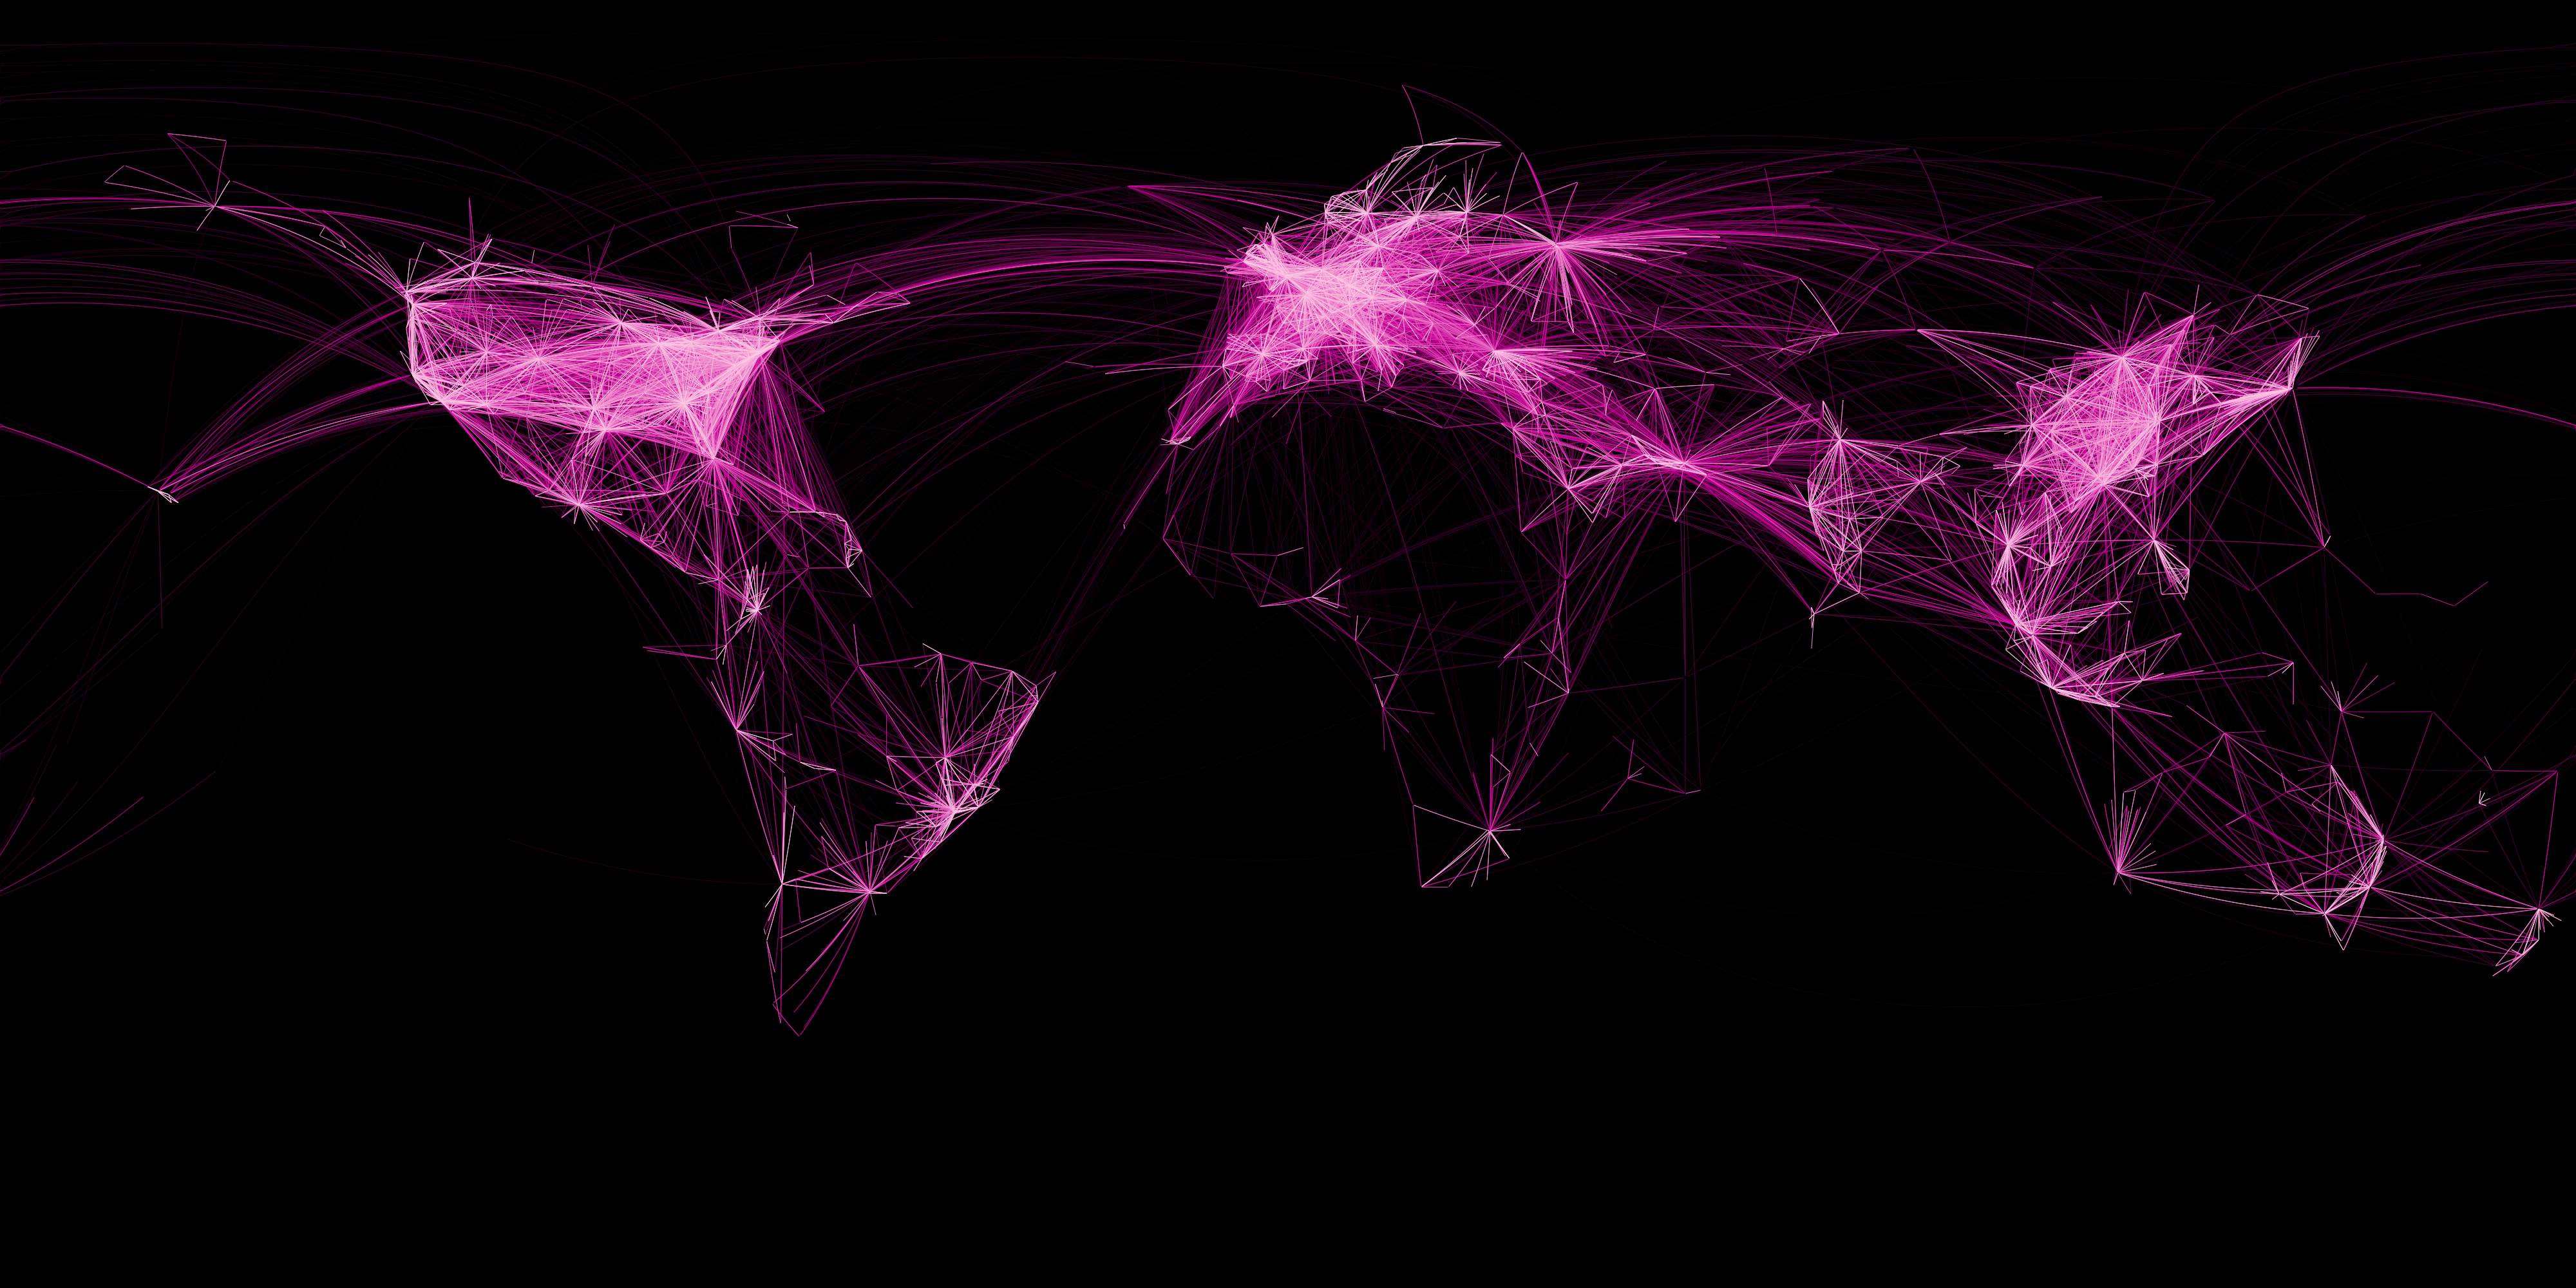

In [ ]:
# run & save
img = gcm.draw()
img.save('flights_map_gcmap.png')
from IPython.display import display, Image
display(Image(filename='flights_map_gcmap.png'))

In [ ]:
!pip install pyproj==1.9.6

  Using cached https://files.pythonhosted.org/packages/26/8c/1da0580f334718e04f8bbf74f0515a7fb8185ff96b2560ce080c11aa145b/pyproj-1.9.6.tar.gz
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702093 sha256=12c9f6cda15a40ab8bd43f0bcdd41035b6490b02ce8654165f15129bf0d44de3
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (174 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm


def plot_map(in_filename, color_mode='screen',
             out_filename='flights_map_mpl.png', absolute=False):
    """Plots the given CSV data files use matplotlib basemap and saves it to
    a PNG file.

    Args:
        in_filename: Filename of the CSV containing the data points.
        out_filename: Output image filename
        color_mode: Use 'screen' if you intend to use the visualisation for
                    on screen display. Use 'print' to save the visualisation
                    with printer-friendly colors.
        absolute: set to True if you want coloring to depend on your dataset
                  parameter value (ie for comparison).
                  When set to false, each coordinate pair gets a different
                  color.

    """

    if color_mode == 'screen':
        bg_color = (0.0, 0.0, 0, 1.0)
        coast_color = (204/255.0, 0, 153/255.0, 0.7)
        color_list = [(0.0, 0.0, 0.0, 0.0),
                      (204/255.0, 0, 153/255.0, 0.6),
                      (255/255.0, 204/255.0, 230/255.0, 1.0)]
    else:
        bg_color = (1.0, 1.0, 1.0, 1.0)
        coast_color = (10.0/255.0, 10.0/255.0, 10/255.0, 0.8)
        color_list = [(1.0, 1.0, 1.0, 0.0),
                      (255/255.0, 204/255.0, 230/255.0, 1.0),
                      (204/255.0, 0, 153/255.0, 0.6)
                      ]

    # define the expected CSV columns
    CSV_COLS = ('dep_lat', 'dep_lon', 'arr_lat', 'arr_lon',
                'nb_flights', 'CO2')

    routes = pd.read_csv(in_filename, names=CSV_COLS, na_values=['\\N'],
                         sep=';', skiprows=1)

    num_routes = len(routes.index)

    # normalize the dataset for color scale
    norm = PowerNorm(0.3, routes['nb_flights'].min(),routes['nb_flights'].max())
    
    # norm = Normalize(routes['nb_flights'].min(), routes['nb_flights'].max())

    # create a linear color scale with enough colors
    if absolute:
        n = routes['nb_flights'].max()
    else:
        n = num_routes
    cmap = LinearSegmentedColormap.from_list('cmap_flights', color_list,
                                             N=n)
    # create the map and draw country boundaries
    plt.figure(figsize=(27, 20))
    m = Basemap(projection='mill', lon_0=0)
    m.drawcoastlines(color=coast_color, linewidth=1.0)
    m.fillcontinents(color=bg_color, lake_color=bg_color)
    m.drawmapboundary(fill_color=bg_color)

    # plot each route with its color depending on the number of flights
    for i, route in enumerate(routes.sort_values(by='nb_flights',
                              ascending=True).iterrows()):
        route = route[1]
        if absolute:
            color = cmap(norm(int(route['nb_flights'])))
        else:
            color = cmap(i * 1.0 / num_routes)

        line, = m.drawgreatcircle(route['dep_lon'], route['dep_lat'],
                                  route['arr_lon'], route['arr_lat'],
                                  linewidth=0.5, color=color)
        # if the path wraps the image, basemap plots a nasty line connecting
        # the points at the opposite border of the map.
        # we thus detect path that are bigger than 30km and split them
        # by adding a NaN
        path = line.get_path()
        cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
        if len(cut_point) > 0:
            cut_point = cut_point[0]
            vertices = np.concatenate([path.vertices[:cut_point, :],
                                      [[np.nan, np.nan]],
                                      path.vertices[cut_point+1:, :]])
            path.codes = None  # treat vertices as a serie of line segments
            path.vertices = vertices

    # save the map
    plt.savefig(out_filename, format='png', bbox_inches='tight')


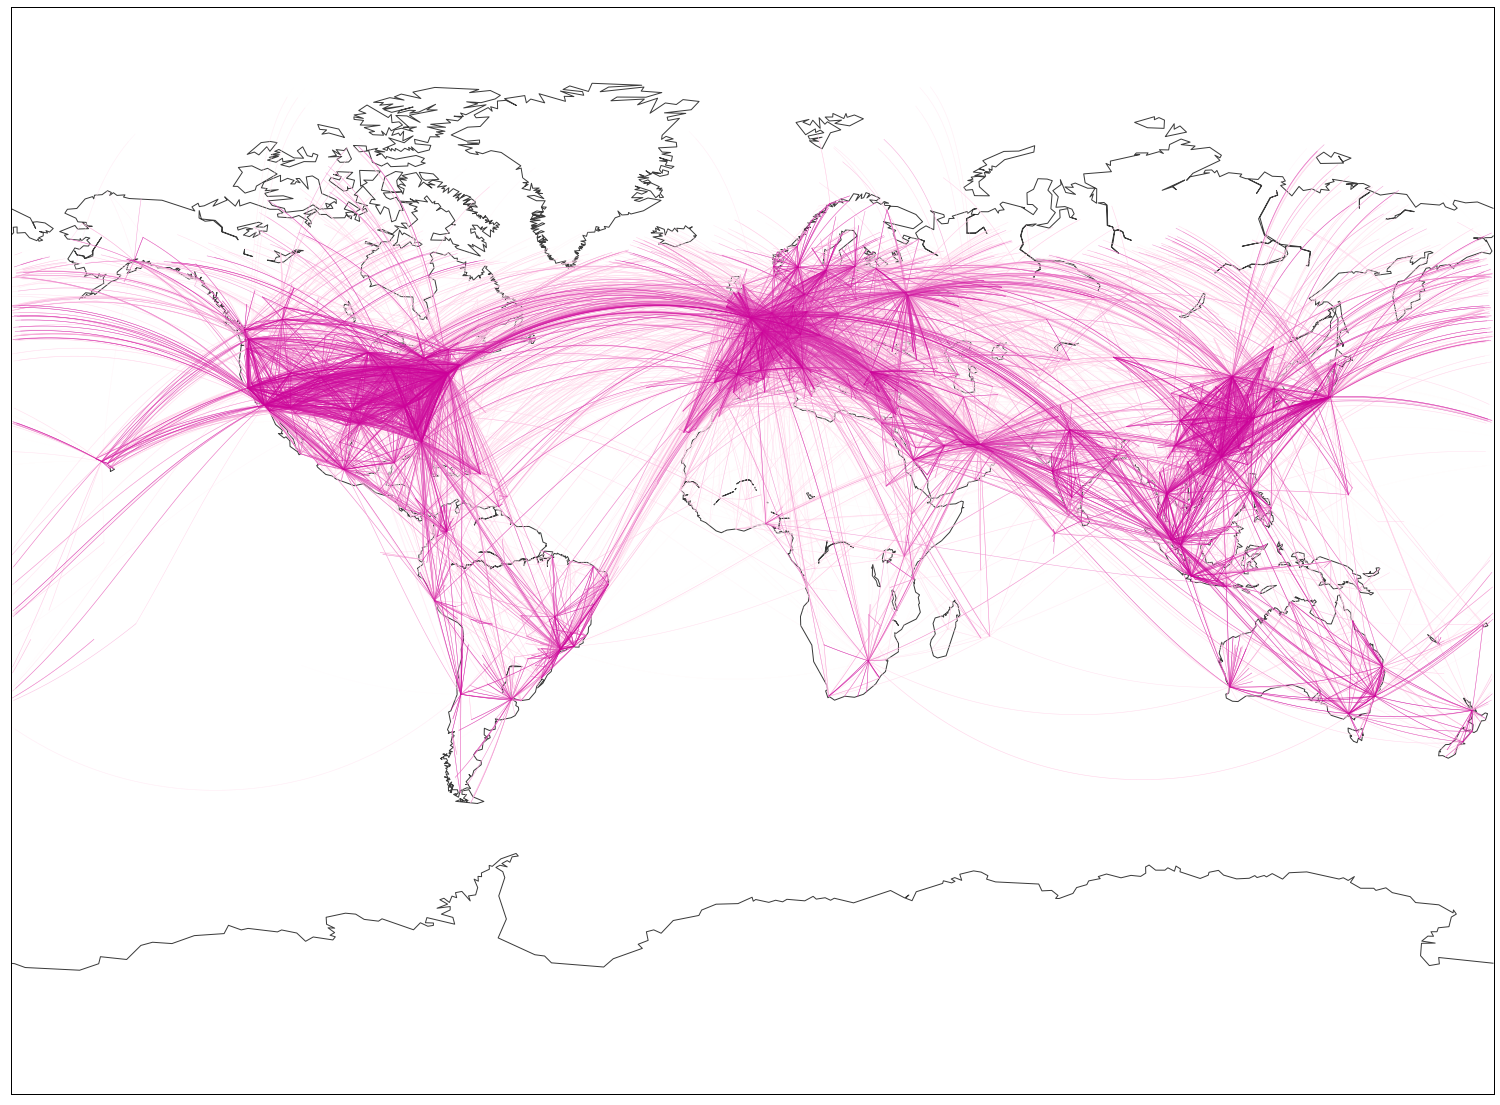

In [ ]:
if __name__ == '__main__':
    # use 'screen' color mode for on-screen display. Use 'print' if you intend
    # to print the map
    plot_map('data_flights.csv', 'print', absolute=False)